<a href="https://colab.research.google.com/github/phuongha47/vinmec_pre/blob/main/Vinmec_analyst_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install rank_bm25

In [ ]:
import pandas as pd
import numpy as np
from rank_bm25 import BM25Okapi
pd.options.display.max_colwidth=160

meta_df = pd.read_csv('/content/vinmec_5k_preprocess.csv') # Or pd.read_csv()

In [ ]:
# meta_df

### Lấy trường dữ liệu

In [ ]:
meta_df = meta_df[['short_question', 'long_question', 'answer']]
# meta_df

### Token

In [ ]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import preprocess_documents, preprocess_string

meta_df_tokens = meta_df.short_question.fillna('').apply(preprocess_string)

### BM25


In [ ]:
from rank_bm25 import BM25Okapi
import numpy as np

bm25_index = BM25Okapi(meta_df_tokens.tolist())

def search(search_string, num_results=10):
    search_tokens = preprocess_string(search_string)
    scores = bm25_index.get_scores(search_tokens)
    top_indexes = np.argsort(scores)[::-1][:num_results]
    return top_indexes

indexes = search('nam giới họng nổi nốt trắng nguyên nhân là gì?')
indexes

array([   2,    1,    0,   14,   21, 3812, 2820,   40,  286, 2983])

### Resulf BM25

In [ ]:
meta_df.loc[indexes, ['short_question', 'answer']]

,short_question,answer
2,nam giới họng nổi nốt trắng nguyên nhân là gì?,dựa theo triệu chứng và lứa tuổi của bạn thì bác sĩ ít nghĩ đến nguyên nhân do ung thư vòm họng. các triệu chứng của bạn gần giống với bệnh lý viêm amidan h...
1,"nam giới lưỡi rát, nổi hột đỏ nguyên nhân là gì?","sự thay đổi màu sắc của lưỡi kèm theo triệu chứng rát ở lưỡi thường liên quan đến viêm nhiễm, thường gặp nhất là viêm họng do trào ngược họng thanh quản dẫ..."
0,nam giới nuốt vướng ở cổ nguyên nhân là gì?,triệu chứng nuốt vướng nhưng vẫn ăn uống được bình thường thì bác sĩ ít nghĩ đến nguyên nhân do ung bướu. dựa theo tuổi của bạn thì cần phải tìm hiểu đến cá...
14,nam giới khô cổ họng sau khi tiêm vắc xin nguyên nhân là gì?,"các triệu chứng mắc covid 19 như sốt, đau họng, ho khó thở, tiêu chảy, . . . hiện tại, bố bạn không có tiếp xúc với người nhiễm covid 19 nên dấu hiệu kh..."
21,sùi mào gà ở nữ giới nguyên nhân là gì?,"nguyên nhân gây nên sùi mào gà do virus hpv gây ra. đường lây của sùi mào gà là đường tình dục do da tiếp xúc trực tiếp với da, niêm mạc miệng, hầu họng h..."
3812,"viêm họng tái đi tái lại, cổ nổi hạch nguyên nhân do đâu?",nổi hạch rất có thể là phản của tình trạng viêm nhiễm họng của cháu chưa được khống chế tốt. những triệu chứng mà cháu mô tả chưa thể kết luận việc cháu bị ...
2820,"vòm họng nổi li ti, hơi rát họng, rất háo nước nguyên nhân làm sao?",những triệu chứng bạn mô tả còn khá mơ hồ nên bác sĩ chưa thể tư vấn cụ thể về tình trạng sức khỏe hiện tại. tốt nhất trong trường hợp rát họng một thời gia...
40,"nữ giới dị dạng mạch máu não, co giật nguyên nhân là gì?","u não có thể gây đau đầu nếu kích thước khối u lớn, chèn ép nhu mô não lân cận, hoặc phù não nhiều. cả khối u và dị dạng mạch máu đều có thể là nguyên nhâ..."
286,nguyên nhân ngứa kèm nổi mẩn đỏ là gì?,"nguyên nhân ngứa và nổi mẩn đỏ có rất nhiều, có thể là bệnh da liễu (như viêm da cơ địa, viêm da tiếp xúc, nấm da, mày đay, . . . . ), nhiễm kí sinh tr..."
2983,nam giới có mắc bệnh ung thư vú không?,"nam giới cũng có thể mắc bệnh ung thư vú. tuy nhiên, ít gặp hơn so với nữ giới. việc điều trị cũng tùy thuộc vào giai đoạn bệnh và một số các yếu tố như: ..."


### Length of long_question

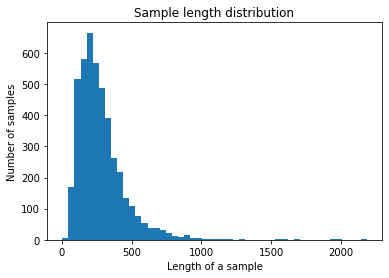

In [ ]:
import matplotlib.pyplot as plt

plt.hist([len(str(s)) for s in meta_df['long_question']], 50)
plt.xlabel('Length of a sample')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

### Length of short_question

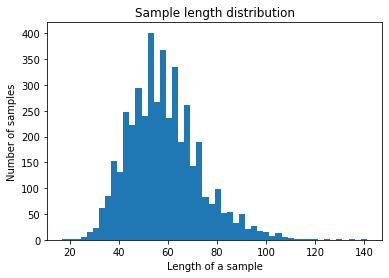

In [ ]:
plt.hist([len(str(s)) for s in meta_df['short_question']], 50)
plt.xlabel('Length of a sample')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

### Remove punctuation

In [ ]:
def remove_punc(a):
  #remove punctuation
  return re.sub(r'[^\w\s]', '', a)

In [ ]:
for i in range(len(meta_df["long_question"])):
  meta_df["long_question"][i] = remove_punc(str(meta_df["long_question"][i]))

### Tokenize

In [ ]:
pip install pyvi


In [ ]:
from pyvi import ViTokenizer

meta_df["long_tokenize"] = ""
for i in range(len(meta_df["long_question"])):
  # print(ViTokenizer.tokenize(str(i)))
  meta_df["long_tokenize"][i] = ViTokenizer.tokenize(str(meta_df["long_question"][i]))

### Write stopwords list to file

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords = get_stopwords(meta_df["long_tokenize"], threshold=3)
with open('stopwords.txt', 'w', encoding='utf8') as fp:
    for word in stopwords:
        fp.write(word + '\n')

1.1282234391607724 4.780808587081939 287


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
for i in range(len(meta_df["long_tokenize"])):
  meta_df["long_tokenize"][i] = meta_df["long_tokenize"][i].split(" ")

In [ ]:
# meta_df

### Word_cloudcloud

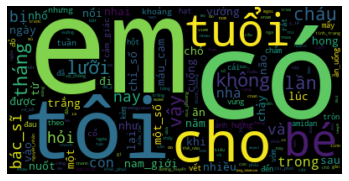

In [ ]:
# Start with one review:
from wordcloud import WordCloud 

text = meta_df.long_tokenize

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Create list stopwords

In [ ]:
def get_stopwords(documents, threshold=3):
    """
    :param documents: list of documents
    :param threshold:
    :return: list of words has idf <= threshold
    """
    tfidf = TfidfVectorizer(min_df=100)
    tfidf_matrix = tfidf.fit_transform(documents)
    features = tfidf.get_feature_names()
    stopwords = []
    print(min(tfidf.idf_), max(tfidf.idf_), len(features))
    for index, feature in enumerate(features):
        if tfidf.idf_[index] <= threshold:
            stopwords.append(feature)
    return stopwords

In [ ]:
meta_df["long_tokenize"]

0       [khoảng, một, tuần, nay, em, nuốt, có, cảm_giác, vướng, ở, cổ, nhưng, không, ảnh_hưởng, đến, ăn_uống, vậy, bác_sĩ, cho, em, hỏi, nam_giới, nuốt, vướng, ở, c...
1       [em, 26, tuổi, đã, 3, tháng, lưỡi, em, bị, rát, và, trắng, trong, cuống, lưỡi, có, nổi, mấy, hột, đỏ, và, không, đau, vậy, bác_sĩ, cho, em, hỏi, nam_giới, l...
2       [cháu, 14, tuổi, ở, vòm, họng, cháu, nổi, một_số, cái, vết, kèm, theo, một_số, hạt, trắng, và, ở, vùng, amidan, có, một, chấm, tròn, trong, họng, cháu, có, ...
3         [tôi, bị, chảy, máu_cam, tái_phát, nhiều, lần, bác_sĩ, cho, tôi, hỏi, nguyên_nhân, chảy, máu_cam, nhiều, lần, cách, khắc_phục, tình_trạng, này, như, thế_nào]
4       [tôi, có, chỉ_số, hba1c, hemoglobin, 7, 2, chỉ_số, đường_huyết, đo, hằng, ngày, từ, 97110, mgdl, trước, ăn, điểm_tâm, thỉnh_thoảng, sau, ăn, trưa, là, 12014...
                                                                                     ...                                                                        

### Read stopword file

In [ ]:
with open('/content/stopwords.txt') as f:
    lines = f.readlines()


In [ ]:
for i in range(len(lines)):
  lines[i] = (lines[i].rstrip("\n"))

In [ ]:
lines

['bác_sĩ',
 'bé',
 'bệnh',
 'bị',
 'cho',
 'chào',
 'cháu',
 'có',
 'cảm_ơn',
 'của',
 'em',
 'giúp',
 'gì',
 'gần',
 'hay',
 'hỏi',
 'khi',
 'khám',
 'không',
 'là',
 'làm',
 'lại',
 'mong',
 'nay',
 'ngày',
 'nhiều',
 'nhà',
 'như',
 'nhưng',
 'nên',
 'năm',
 'phải',
 'ra',
 'rất',
 'sau',
 'thuốc',
 'tháng',
 'thì',
 'thấy',
 'trong',
 'tuổi',
 'tôi',
 'tư_vấn',
 'uống',
 'viêm',
 'và',
 'vẫn',
 'vậy',
 'xin',
 'đau',
 'đi',
 'điều_trị',
 'đây',
 'đã',
 'được',
 'đến',
 'để']

### Remove stopworstopwords

In [ ]:
meta_dff= ""
import re

for i in range(len(meta_df["long_tokenize"])):
  for j in meta_df["long_tokenize"][i]:
    #remove stopword
    meta_dff = [word for word in meta_df["long_tokenize"][i] if word not in lines]
  meta_df["long_tokenize"][i] = meta_dff


In [ ]:
meta_df

,short_question,long_question,answer,long_tokenize
0,nam giới nuốt vướng ở cổ nguyên nhân là gì?,khoảng một tuần nay em nuốt có cảm giác vướng ở cổ nhưng không ảnh hưởng đến ăn uống vậy bác sĩ cho em hỏi nam giới nuốt vướng ở cổ nguyên nhân là gì có nên...,triệu chứng nuốt vướng nhưng vẫn ăn uống được bình thường thì bác sĩ ít nghĩ đến nguyên nhân do ung bướu. dựa theo tuổi của bạn thì cần phải tìm hiểu đến cá...,"[khoảng, một, tuần, nuốt, cảm_giác, vướng, ở, cổ, ảnh_hưởng, ăn_uống, nam_giới, nuốt, vướng, ở, cổ, nguyên_nhân]"
1,"nam giới lưỡi rát, nổi hột đỏ nguyên nhân là gì?",em 26 tuổi đã 3 tháng lưỡi em bị rát và trắng trong cuống lưỡi có nổi mấy hột đỏ và không đau vậy bác sĩ cho em hỏi nam giới lưỡi rát nổi hột đỏ nguyên nhân...,"sự thay đổi màu sắc của lưỡi kèm theo triệu chứng rát ở lưỡi thường liên quan đến viêm nhiễm, thường gặp nhất là viêm họng do trào ngược họng thanh quản dẫ...","[26, 3, lưỡi, rát, trắng, cuống, lưỡi, nổi, mấy, hột, đỏ, nam_giới, lưỡi, rát, nổi, hột, đỏ, nguyên_nhân]"
2,nam giới họng nổi nốt trắng nguyên nhân là gì?,cháu 14 tuổi ở vòm họng cháu nổi một số cái vết kèm theo một số hạt trắng và ở vùng amidan có một chấm tròn trong họng cháu có khá nhiều chấm trắng ở thể nổ...,dựa theo triệu chứng và lứa tuổi của bạn thì bác sĩ ít nghĩ đến nguyên nhân do ung thư vòm họng. các triệu chứng của bạn gần giống với bệnh lý viêm amidan h...,"[14, ở, vòm, họng, nổi, một_số, cái, vết, kèm, theo, một_số, hạt, trắng, ở, vùng, amidan, một, chấm, tròn, họng, khá, chấm, trắng, ở, thể, nổi, nuốt, nước_b..."
3,nguyên nhân chảy máu cam nhiều lần?,tôi bị chảy máu cam tái phát nhiều lần bác sĩ cho tôi hỏi nguyên nhân chảy máu cam nhiều lần cách khắc phục tình trạng này như thế nào,"tình trạng chảy máu mũi vẫn thường gặp ở các lứa tuổi khác nhau. có những nguyên nhân bệnh lý tại mũi như viêm mũi dị ứng, viêm mũi xoang, lệch vẹo vách n...","[chảy, máu_cam, tái_phát, lần, nguyên_nhân, chảy, máu_cam, lần, cách, khắc_phục, tình_trạng, này, thế_nào]"
4,tự ý dừng uống thuốc tiểu đường có sao không?,tôi có chỉ số hba1c hemoglobin 7 2 chỉ số đường huyết đo hằng ngày từ 97110 mgdl trước ăn điểm tâm thỉnh thoảng sau ăn trưa là 120140 mgdl tôi ngưng dùng me...,"chỉ số đường huyết lúc đói, bất kỳ của bạn đạt mục tiêu. chỉ số hba1c tạm ổn. điều trị bệnh tiểu đường đạt mục tiêu và duy trì ổn định, cần kiềng 3 chân l...","[chỉ_số, hba1c, hemoglobin, 7, 2, chỉ_số, đường_huyết, đo, hằng, từ, 97110, mgdl, trước, ăn, điểm_tâm, thỉnh_thoảng, ăn, trưa, 120140, mgdl, ngưng, dùng, me..."
...,...,...,...,...
4423,có thể thay đổi lịch tiêm vắc-xin viêm màng não mủ được không?,cháu nhà em sinh năm 2010 em có cho bé chích ngừa mũi viêm màng não mủ do não mô cầu 1 lần vào năm 2012 còn 1 lần nhắc lại vào năm 2015 nhưng em chưa cho bé...,menngoc ac phòng viêm màng não do não mô cầu ac tiêm cho trẻ trên 2 tuổi tiêm nhắc lại sau 3 năm 3. hiện nay có vắc-xin mới menactra phòng viêm màng não do...,"[sinh, 2010, chích, ngừa, mũi, màng, não, mủ, do, não, mô, cầu, 1, lần, vào, 2012, còn, 1, lần, nhắc, vào, 2015, chưa, chích, nhắc, chích, ạ, sự, trả_lời]"
4424,sau nhổ răng số 8 có cần khâu lại huyệt nhổ răng?,sau khi tôi nhổ răng số 8 được 5 ngày thì chỗ nhổ tạo thành 1 lỗ trống rất to như vậy tôi có phải đi khâu lại không thưa bác sĩ mong bác sĩ tư vấn giúp tôi,"với tình trạng hiện tại của anh, anh nên theo dõi huyệt nhổ răng. sau 5 ngày thì vẫn còn đau ít, anh cần súc miệng nước muối sinh lý và vệ sinh răng miệng...","[nhổ, răng, số, 8, 5, chỗ, nhổ, tạo, thành, 1, lỗ, trống, to, khâu, thưa]"
4425,chụp x-quang nhiều lần có gây nguy hiểm cho trẻ không?,con trai em lúc 7 tháng tuổi bị ngã bật ngửa đầu xuống nền nhà cứng nên vợ chồng em đưa bé đi khám ở cơ sở y tế địa phương do lo lắng nên em xin bác sĩ chụp...,"đối với trẻ em, khi chụp x-quang thông thường sẽ được kỹ thuật viên che chắn bộ phận sinh dục bằng áo chì, nếu bé không được che chắn thì người nhà có thể...","[con_trai, lúc, 7, ngã, bật, ngửa, đầu, xuống, nền, cứng, vợ_chồng, đưa, ở, cơ_sở, y_tế, đị

Word_cloud after removing stopwords

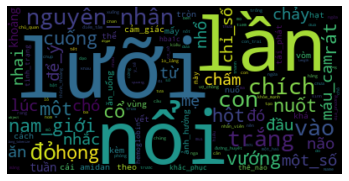

In [ ]:
from wordcloud import WordCloud 

# Start with one review:
text = meta_df.long_tokenize

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()